# Ex. 1

**Steps** : 

  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes

  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation

  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples

  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.

  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.

## Sol. 1

### Load data

In [1]:
import pandas as pd 
import numpy as np

seed_value = 10
np.random.seed(seed_value)

data_path = 'Data/'
results_path = 'Results/'

# Load training and testing data
train_data = pd.read_csv(data_path + "train.csv")
test_data = pd.read_csv(data_path + "test.csv")

X_train = train_data[["X", "Y"]].to_numpy(dtype=np.double)
C_train = train_data["C"].to_numpy(dtype=np.int32).reshape(-1, 1)

X_test = test_data[["X", "Y"]].to_numpy(dtype=np.double)
C_test = test_data["C"].to_numpy(dtype=np.int32).reshape(-1, 1)

### Visualise data

Text(0, 0.5, 'y')

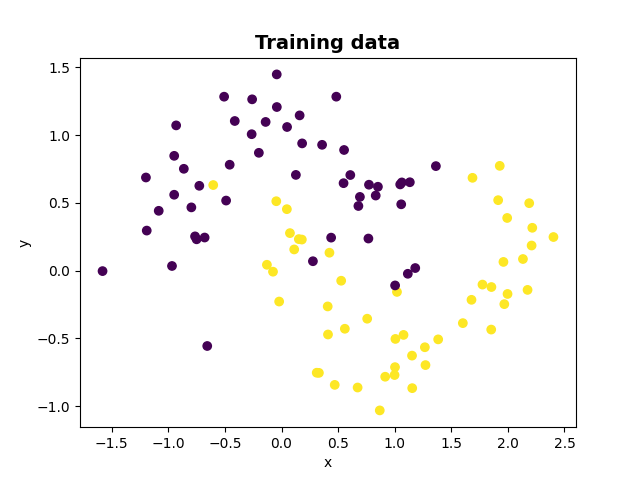

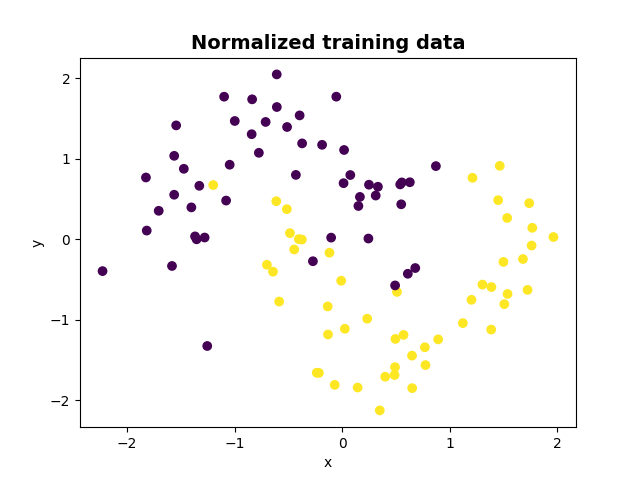

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt #  matplotlib for visualization

def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    return (X - mu) / sigma


# Visualize original data
fig1 = plt.figure()
plt.title("Training data", fontsize=14, fontweight="bold")
plt.scatter(X_train[:,0], X_train[:,1], c=C_train)
plt.xlabel("x")
plt.ylabel("y")

# Normalize dataset
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

# Visualize normalized data
fig2 = plt.figure()
plt.title("Normalized training data", fontsize=14, fontweight="bold")
plt.scatter(X_train_norm[:,0], X_train_norm[:,1], c=C_train)
plt.xlabel("x")
plt.ylabel("y")

### Implement MLP using numpy

In [3]:
class MLP(object):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1):        
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X, update=True):
        #Compute inputs from outputs
        z2 = np.dot(X, self.W1)
        a2 = self.sigmoid(z2)
        z3 = np.dot(a2, self.W2)
        if update:
            self.z2 = z2
            self.a2 = a2
            self.z3 = z3
        yHat = self.sigmoid(z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def loss(self, yHat, y): # Cross entropy
        # Compute loss for given X,y, use weights already stored in class.
        H = np.multiply(-y, np.log(yHat)) - np.multiply((1-y), np.log(1-yHat))
        J = 1/y.size * np.sum(H) # CrossEntropy
        return J

    def lossPrime(self, yHat, y): # Cross entropy
        dJdyHat = np.divide(-y, yHat) + np.divide(1-y, 1-yHat)
        return dJdyHat
        
    # Derivative of parameters
    def backward(self,X, yHat, y):
        self.yHat = yHat
        
        delta3 = np.multiply(self.lossPrime(yHat, y), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        return dJdW1,dJdW2


### Train MLP and visualise decision boundary

#### Train the network

In [4]:
def train(NN,X_train, X_test, y_train, y_test, epoch = 10000, lr = .1, verbose=False):
    train_list_loss = []
    test_list_loss = []
    
    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        
        #TODO: ask the teacher how to do this properly
        yHat_test = NN.forward(X_test, update=False)
        yHat_train = NN.forward(X_train)

        
        gradW1,gradW2 = NN.backward(X_train,yHat_train,y_train)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr
        
        if i%100 == 0 :  
            train_loss = NN.loss(yHat_train, y_train)
            test_loss = NN.loss(yHat_test, y_test)
            if verbose:
                print('Train Loss {}={}'.format(i,train_loss))
                print('Test Loss {}={}'.format(i,test_loss))

            train_list_loss.append(train_loss)
            test_list_loss.append(test_loss)
        
    return train_list_loss, test_list_loss


NN = MLP(hiddenNode=20)
#Train network with the data:
train_list_loss, test_list_loss = train(NN, X_train_norm, X_test_norm, C_train, C_test, epoch=10000, lr=0.01)

#### Visualize the decision boundary

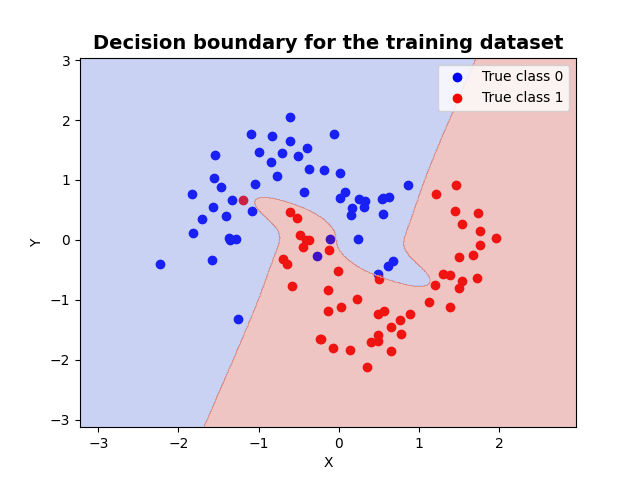

In [5]:
def classify(NN, X):
    yHat = NN.forward(X)
    return yHat.round().astype(int)

# Plot the training data as a scatter plot (for reference)
fig3 = plt.figure()
class_0_points = X_train_norm[C_train[:,0] == 0]
class_1_points = X_train_norm[C_train[:,0] == 1]
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], color='blue', label='True class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], color='red', label='True class 1')

def boundary_points(X, NN):
    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = classify(NN, grid_points)
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

xx_train, yy_train, Z = boundary_points(X_train_norm, NN) 
plt.contourf(xx_train, yy_train, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision boundary for the training dataset', fontsize=14, fontweight="bold")
plt.legend()

plt.show()

### Plot the loss function

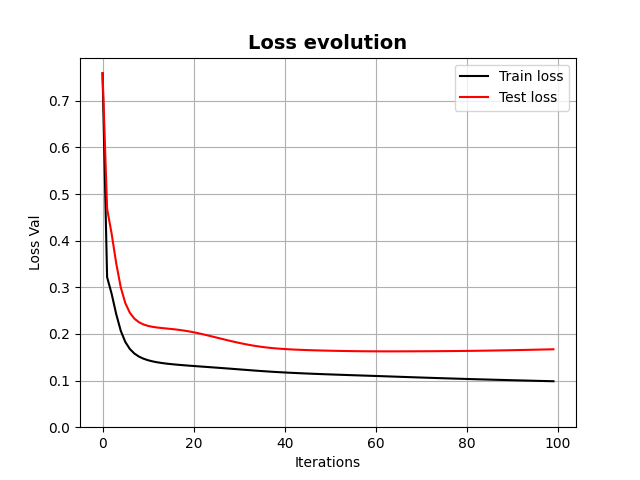

In [6]:
%matplotlib widget

# Visualize loss function iterations
fig4 = plt.figure()
plt.title('Loss evolution', fontsize=14, fontweight="bold")
plt.plot(train_list_loss, color="black", label="Train loss")
plt.plot(test_list_loss, color="red", label="Test loss")
plt.xlabel('Iterations')
plt.ylabel('Loss Val')
plt.legend()
plt.ylim(0, None)
plt.grid()
plt.show()


### Classify the data in test.csv using the trained MLP

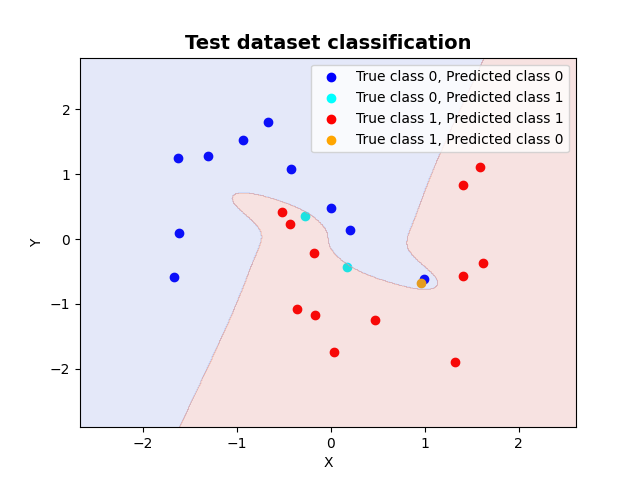

In [7]:
output_test = classify(NN, X_test_norm)
                                
true0_pred0_points = X_test_norm[(C_test[:,0] == 0) & (output_test[:,0] == 0)]
true0_pred1_points = X_test_norm[(C_test[:,0] == 0) & (output_test[:,0] == 1)]
true1_pred1_points = X_test_norm[(C_test[:,0] == 1) & (output_test[:,0] == 1)]
true1_pred0_points = X_test_norm[(C_test[:,0] == 1) & (output_test[:,0] == 0)]

fig5 = plt.figure()
plt.scatter(true0_pred0_points[:, 0], true0_pred0_points[:, 1], color='blue', label='True class 0, Predicted class 0')
plt.scatter(true0_pred1_points[:, 0], true0_pred1_points[:, 1], color='cyan', label='True class 0, Predicted class 1')
plt.scatter(true1_pred1_points[:, 0], true1_pred1_points[:, 1], color='red', label='True class 1, Predicted class 1')
plt.scatter(true1_pred0_points[:, 0], true1_pred0_points[:, 1], color='orange', label='True class 1, Predicted class 0')

xx_test, yy_test, Z_test = boundary_points(X_test_norm, NN)
plt.contourf(xx_test, yy_test, Z_test, alpha=0.15, cmap='coolwarm')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test dataset classification', fontsize=14, fontweight="bold")
plt.legend()
plt.show()


# Ex. 2

Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum. 
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.

**Steps** : 

  1. Try to understand how momentum is implemented reading carefully https://ruder.io/optimizing-gradient-descent/index.html#momentum, or https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d

  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom. 

  3. Train the MLP implmented in numpy with this new optimizer. 

  4. Use different values for the momentum paramter `[0,1]` and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.

## Sol. 2

In [8]:
class OptimMom(object):
    def __init__(self, learning_rate = .01, beta = .9):
        self.lr = learning_rate
        self.beta = beta
        self.vt_previous = []
    # receive the parameters of the MLP and the computed gradients and update the latter
    def step(self,weight_list,gradient, iteration):
        uw = []
        self.vt_previous = []

        if len(self.vt_previous) == 0:
            for w in weight_list:
                self.vt_previous.append(np.zeros(w.shape))
        
        i = 0
        for w,grd in zip(weight_list,gradient):
            vt = self.moving_average(grd, self.vt_previous[i]) 
            
            #FIXME: decide whether to use bias correction or not. 
            vt = vt / (1 - self.beta**(iteration+1)) # bias correction
            uw.append(w - self.lr * vt)
            self.vt_previous[i] = vt
            i += 1
            
        return uw

    def moving_average(self, gradW, vt_prev):
        # print("gradW", gradW)
        return self.beta * vt_prev + (1 - self.beta) * gradW


In [9]:
# Same training procedure than befor but using the optimizer class
def train_woptimizer(NN,X, y,epoch = 5000,optim = None):
    list_loss = []
    
    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)
        
        gradW1,gradW2 = NN.backward(X,yHat,y)
        #now update the weight using the optimizer class
        NN.W1, NN.W2 = optim.step([NN.W1,NN.W2],[gradW1,gradW2], i)
        
        if i%100 == 0 : 
            loss = NN.loss(yHat,y)
            # print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)
        
    return list_loss

### Train a new network with SGD and momentum

In [10]:
np.random.seed(seed_value)
NN_momentum = MLP(hiddenNode=20)
#Train network with the data:
momentum_list_loss = train_woptimizer(NN_momentum, X_train_norm, C_train, epoch=10000, optim=OptimMom(learning_rate=0.1, beta=0.9))

### Visualize the loss function and compare it with the first exercise

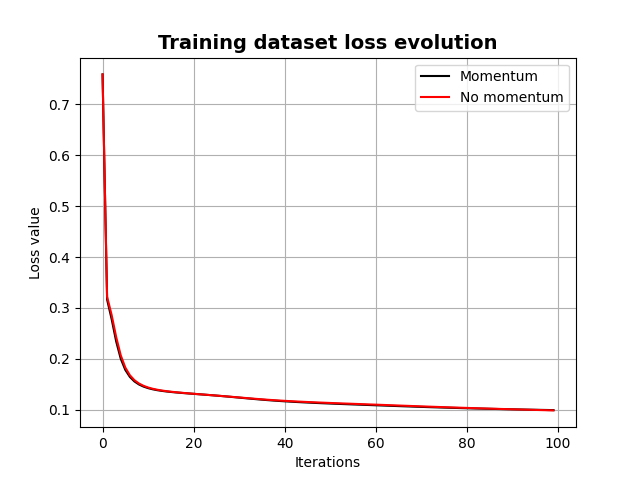

In [11]:
%matplotlib widget
fig6 = plt.figure()

plt.plot(momentum_list_loss, color="black", label="Momentum")
plt.plot(train_list_loss, color="red", label="No momentum")
plt.title("Training dataset loss evolution", fontsize=14, fontweight="bold")
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.grid()
plt.legend()
plt.show()


### Try different $\beta$ values and visualize the loss function

/var/folders/bb/k3h89cnn2n72m0320kgpj89w0000gn/T/ipykernel_1512/1197301993.py:40: RuntimeWarning: invalid value encountered in divide
  dJdyHat = np.divide(-y, yHat) + np.divide(1-y, 1-yHat)


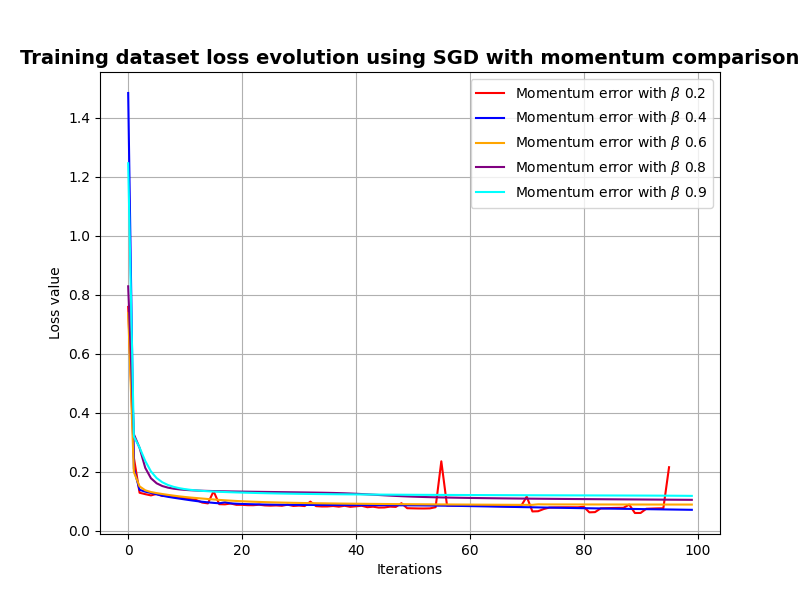

In [12]:
# %matplotlib widget

## We can do it this way since we are using a fixed random seed

fig7 = plt.figure(figsize=(8, 6))
betas = [0.2, 0.4, 0.6, 0.8, 0.9]
colors = ["red", "blue", "orange", "purple", "cyan"]
assert len(betas) == len(colors)
losses = {}
#Train network with the data:
np.random.seed(seed_value)
for b in betas:
    NN_momentum = MLP(hiddenNode=20)
    temp_loss = train_woptimizer(NN_momentum, X_train_norm, C_train, epoch=10000, optim=OptimMom(learning_rate=0.1, beta=b))
    losses[b] = temp_loss

i = 0
for beta in losses:
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(losses[beta], color=colors[i], label=f"Momentum error with $\\beta$ {beta}")
    i += 1



plt.title("Training dataset loss evolution using SGD with momentum comparison", fontsize=14, fontweight="bold")
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.grid()
plt.legend()
plt.show()

# Ex. 3

**Steps** : 

  1. Do the same as Ex. 1 but implementing the `MLP` using `PyTorch`.

  2. Train different vesions of the `MLP` by varying the number of hidden neurons and learing rates

  3. Analyse the results in each case and discuss them.

> HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in `PyTorch` you have to use in this case.

## Sol. 3